In [10]:
import pandas as pd

# Load the data
df = pd.read_csv("your_address/promotional_sales_data.csv")

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original 'date' column
df = df.drop('date', axis=1)

from sklearn.preprocessing import LabelEncoder

# Encode categorical features 'location' and 'product_type'
location_encoder = LabelEncoder()
product_type_encoder = LabelEncoder()

df['location_encoded'] = location_encoder.fit_transform(df['location'])
df['product_type_encoded'] = product_type_encoder.fit_transform(df['product_type'])

# Create mappings for location and product types
location_mapping = dict(zip(range(len(location_encoder.classes_)), location_encoder.classes_))
product_type_mapping = dict(zip(range(len(product_type_encoder.classes_)), product_type_encoder.classes_))

# Drop the original categorical columns
df.drop(['location', 'product_type'], axis=1, inplace=True)

# Prepare the features (X) and target (y) for the model
X = df.drop('total_sales', axis=1)
y = df['total_sales']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a GradientBoostingRegressor model and evaluate its performance on test set
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output model evaluation results
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

# Get feature importances and sort them in descending order
feature_importances = model.feature_importances_

# Pair the feature names with their importance scores
feature_importances_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importances = {k: v for k, v in sorted(feature_importances_dict.items(), key=lambda item: item[1], reverse=True)}

# Convert the dictionary to a DataFrame
import pandas as pd
importance_df = pd.DataFrame(sorted_feature_importances.items(), columns=['Feature', 'Importance'])

# Output feature importances
print(importance_df)


from sklearn.model_selection import cross_val_score

# Perform cross-validation to get the mean MSE
model = GradientBoostingRegressor()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
mean_cv_mse = cv_mse_scores.mean()

# Output mean cross-validation MSE
print(f"Mean Cross-Validation MSE: {mean_cv_mse}")

from sklearn.model_selection import GridSearchCV

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_model = grid_search.best_estimator_

cv_scores_bestm = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores_best = -cv_scores_bestm
mean_cv_mse_best = cv_mse_scores_best.mean()

# Output mean cross-validation MSE of the best model
print(f"Mean Cross Val MSE of the Best model: {mean_cv_mse_best}")



MSE: 21.45749956703737
MAE: 3.233177687862987
R2: 0.9999961054527184
                    Feature    Importance
0             quantity_sold  6.994924e-01
1   promotional_sales_price  2.007323e-01
2      product_type_encoded  9.392915e-02
3                 lead_time  2.883467e-03
4                 unit_cost  1.620517e-03
5               sales_price  1.031270e-03
6                order_cost  3.096640e-04
7                 promotion  1.258301e-06
8               demand_rate  1.321257e-14
9         current_inventory  1.515805e-15
10                     year  0.000000e+00
11                    month  0.000000e+00
12                      day  0.000000e+00
13         location_encoded -1.434994e-24
Mean Cross-Validation MSE: 17.03999699494983
Mean Cross Val MSE of the Best model: 0.004281008987299798


1000mm BBQ: 15199184.00 (Non-Promotional), 12184972.80 (Promotional)
600mm BBQ: 9865882.00 (Non-Promotional), 8127995.20 (Promotional)
Beer Fridge: 11363352.00 (Non-Promotional), 9453444.00 (Promotional)
Gas Rob (2 Burners): 3910400.00 (Non-Promotional), 3213184.00 (Promotional)


<Figure size 1000x600 with 0 Axes>

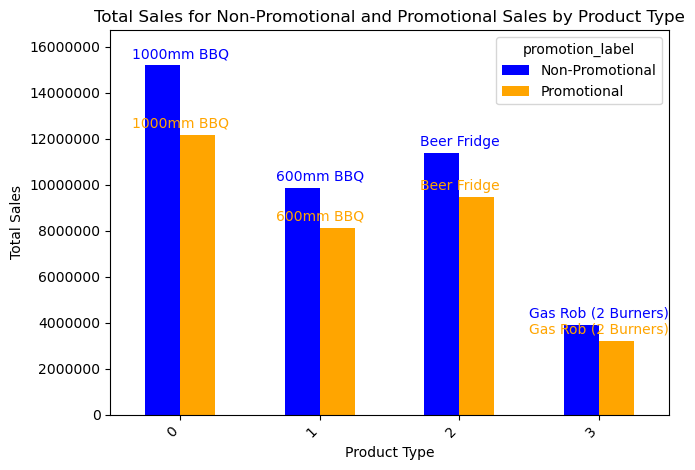

Product Type: Quantity Sold (Promotional) / Quantity Sold (Non-Promotional)
1000mm BBQ: 3804.00 (Promotional), 3796.00 (Non-Promotional)
600mm BBQ: 3869.00 (Promotional), 3757.00 (Non-Promotional)
Gas Rob (2 Burners): 3862.00 (Promotional), 3760.00 (Non-Promotional)
Beer Fridge: 3935.00 (Promotional), 3784.00 (Non-Promotional)


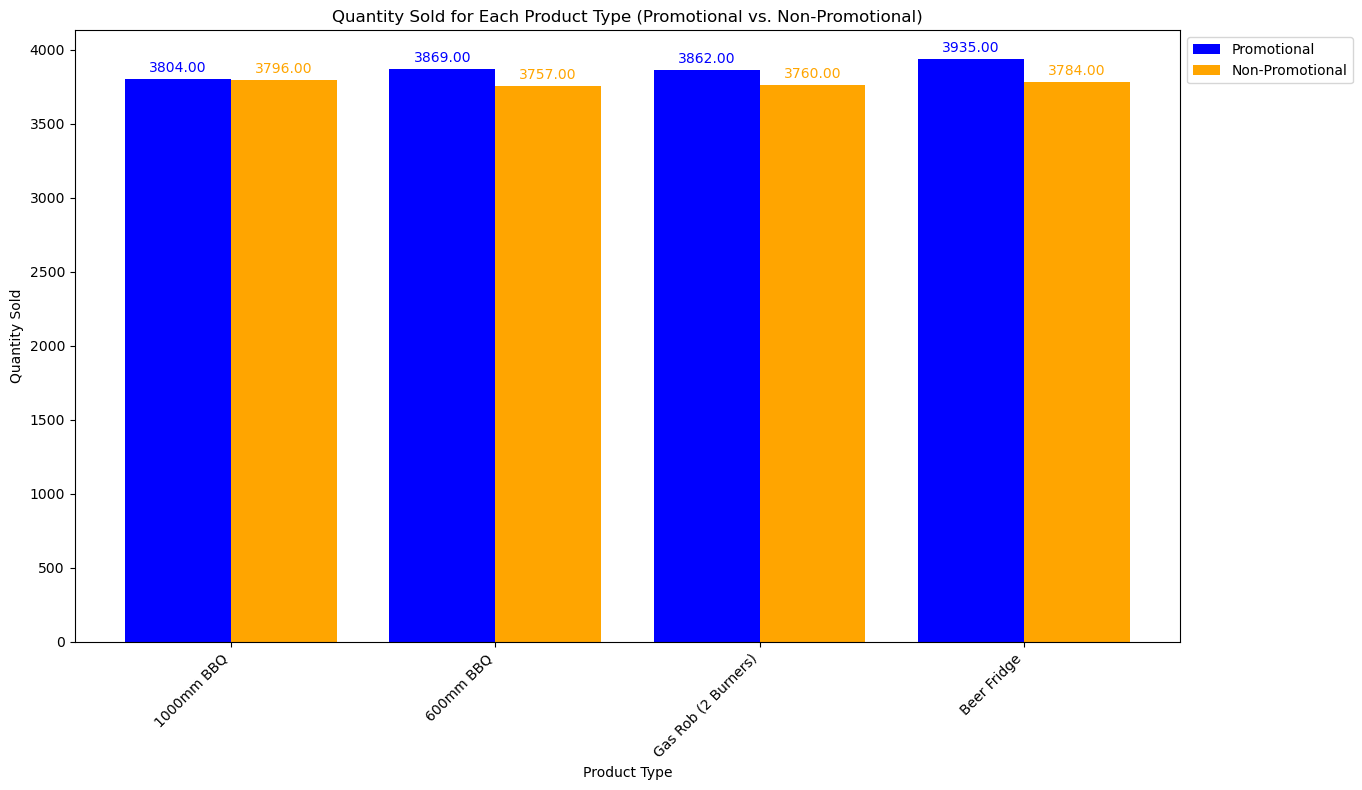

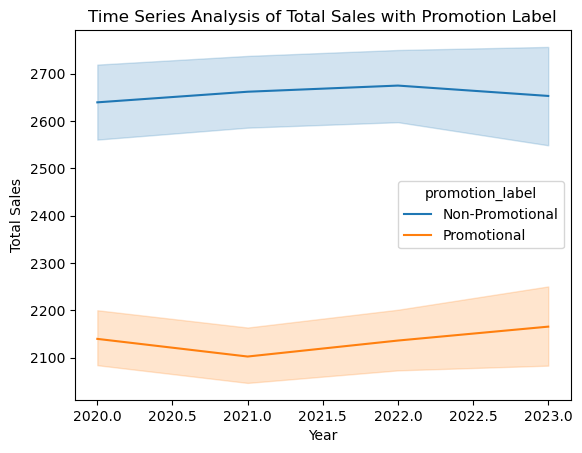

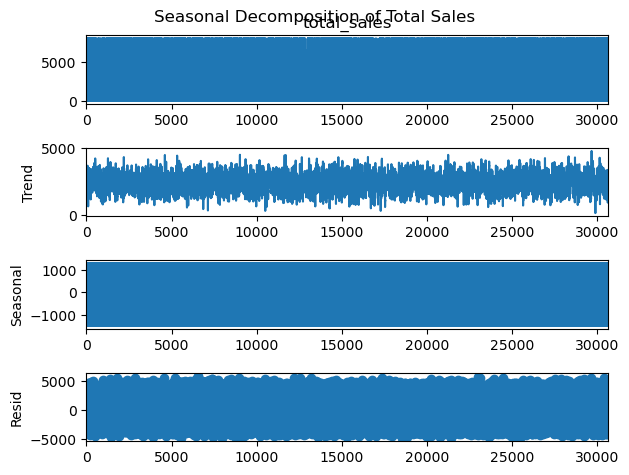

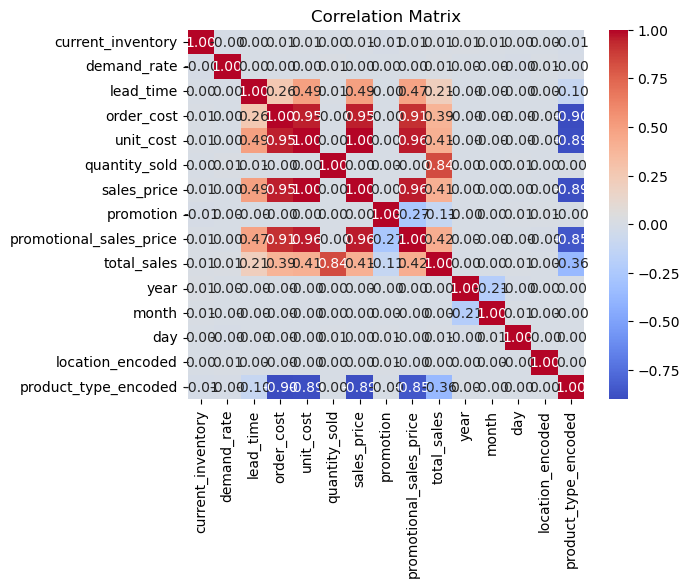

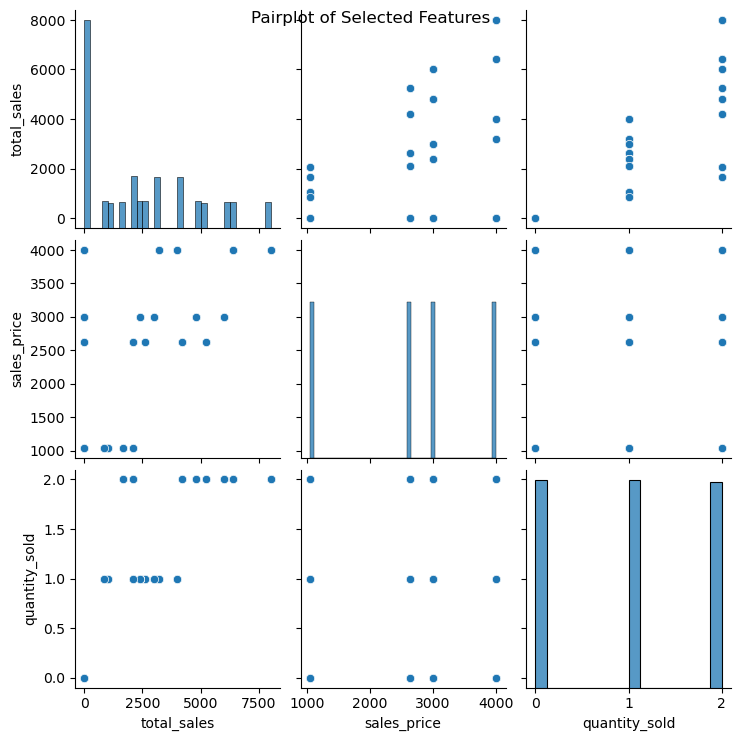

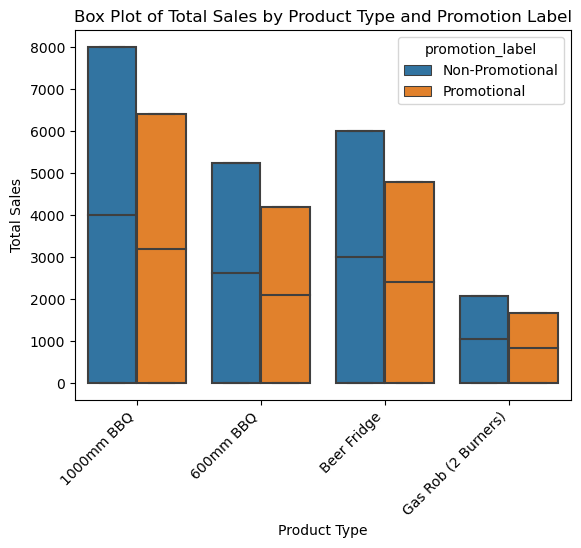

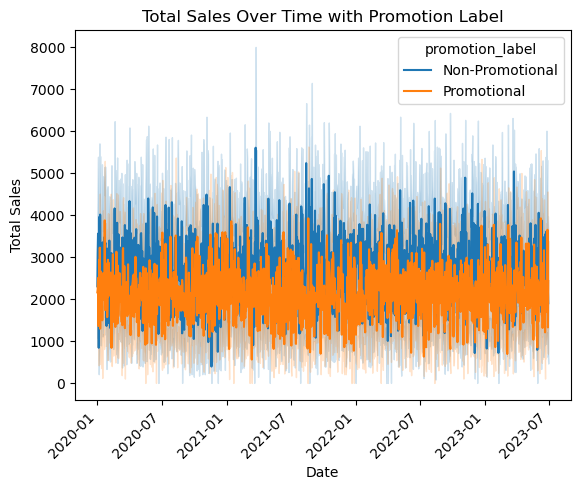

Comparative Analysis of Total Sales by Location and Promotion Label

France (Non-Promotional): 6806475.00
France (Promotional): 5377902.40
Germany (Non-Promotional): 6875232.00
Germany (Promotional): 5356093.60
Italy (Non-Promotional): 6576284.00
Italy (Promotional): 5404068.80
Portugal (Non-Promotional): 6685809.00
Portugal (Promotional): 5604227.20
Spain (Non-Promotional): 6814665.00
Spain (Promotional): 5627117.60
UK (Non-Promotional): 6580353.00
UK (Promotional): 5610186.40


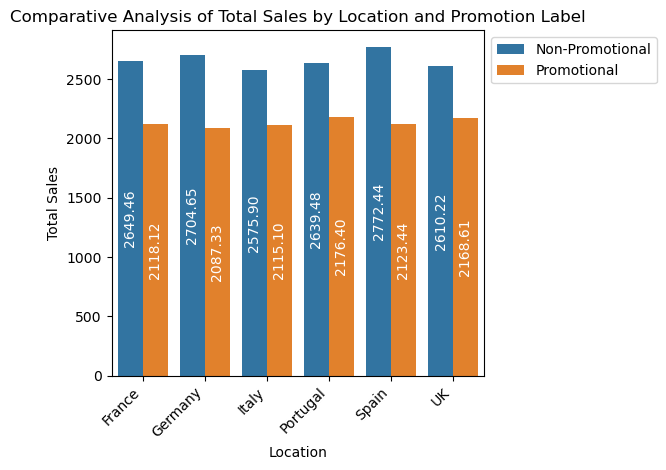

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'promotion' feature represents whether the sale is promotional or not
df['promotion_label'] = df['promotion'].map({0: 'Non-Promotional', 1: 'Promotional'})

# Calculate the sum of total sales for each product type and sales type
sum_total_sales = df.groupby(['product_type_encoded', 'promotion_label'])['total_sales'].sum().unstack()

# Output total sales for each product type
for product_type in sum_total_sales.index:
    sum_sales_non_promotional = df[(df['product_type_encoded'] == product_type) & (df['promotion'] == 0)]['total_sales'].sum()
    sum_sales_promotional = df[(df['product_type_encoded'] == product_type) & (df['promotion'] == 1)]['total_sales'].sum()
    print(f"{product_type_mapping[product_type]}: {sum_sales_non_promotional:.2f} (Non-Promotional), {sum_sales_promotional:.2f} (Promotional)")

# Create the bar plot
plt.figure(figsize=(10, 6))
sum_total_sales.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.title('Total Sales for Non-Promotional and Promotional Sales by Product Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add labels to the bars
for i, product_type in enumerate(sum_total_sales.index):
    plt.annotate(f"{product_type_mapping[product_type]}", xy=(i, sum_total_sales.loc[product_type, 'Non-Promotional']), 
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')
    plt.annotate(f"{product_type_mapping[product_type]}", xy=(i, sum_total_sales.loc[product_type, 'Promotional']), 
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='orange')

# Set the y-axis limits based on the maximum total sales value
y_max = sum_total_sales.values.max() * 1.1  # Add 10% buffer space above the highest value
plt.ylim(bottom=0, top=y_max)

# Format y-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

# Assuming the 'product_type_encoded' feature represents the product types
product_type_encoded_values = df['product_type_encoded'].unique()

product_names = []
quantity_sold_promotional = []
quantity_sold_non_promotional = []

print("Product Type: Quantity Sold (Promotional) / Quantity Sold (Non-Promotional)")

# Compute and output quantity sold for each product type (promotional vs. non-promotional)
for product_type in product_type_encoded_values:
    product_name = product_type_mapping.get(product_type, f"Product {product_type}")
    
    # Filter the data for the current product and promotional sales
    product_promo_df = df[(df['product_type_encoded'] == product_type) & (df['promotion'] == 1)]
    total_quantity_sold_promo = product_promo_df['quantity_sold'].sum()
    
    # Filter the data for the current product and non-promotional sales
    product_non_promo_df = df[(df['product_type_encoded'] == product_type) & (df['promotion'] == 0)]
    total_quantity_sold_non_promo = product_non_promo_df['quantity_sold'].sum()
    
    product_names.append(product_name)
    quantity_sold_promotional.append(total_quantity_sold_promo)
    quantity_sold_non_promotional.append(total_quantity_sold_non_promo)
    
    print(f"{product_name}: {total_quantity_sold_promo:.2f} (Promotional), {total_quantity_sold_non_promo:.2f} (Non-Promotional)")

# Create a color palette for the bars
colors = ['red', 'blue', 'orange', 'yellow']

# Create the bar plot with different colors for each product type
plt.figure(figsize=(12, 8))
bar_width = 0.4
bar_positions = np.arange(len(product_names))

bars1 = plt.bar(bar_positions, quantity_sold_promotional, width=bar_width, color='blue', label='Promotional')
bars2 = plt.bar(bar_positions + bar_width, quantity_sold_non_promotional, width=bar_width, color='orange', label='Non-Promotional')

plt.xlabel('Product Type')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold for Each Product Type (Promotional vs. Non-Promotional)')
plt.xticks(bar_positions + bar_width / 2, product_names, rotation=45, ha='right')
plt.tight_layout()

# Add values on top of the bars
for bar1, bar2 in zip(bars1, bars2):
    plt.annotate(f"{bar1.get_height():.2f}", xy=(bar1.get_x() + bar1.get_width() / 2, bar1.get_height()), 
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')
    plt.annotate(f"{bar2.get_height():.2f}", xy=(bar2.get_x() + bar2.get_width() / 2, bar2.get_height()), 
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='orange')

# Add legend box outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

import seaborn as sns

# Time series analysis of total sales
sns.lineplot(data=df, x='year', y='total_sales', hue='promotion_label')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Time Series Analysis of Total Sales with Promotion Label')
plt.show()

# Seasonal decomposition of total sales
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['total_sales'], model='additive', period=12)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Total Sales')
plt.show()


# Compute correlation matrix between features and total sales
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
selected_features = ['total_sales', 'sales_price', 'quantity_sold']
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Features')
plt.show()

# Assuming 'date' column was dropped and 'year', 'month', 'day' columns exist
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Box plot of total sales by product type and promotion label
sns.boxplot(data=df, x='product_type_encoded', y='total_sales', hue='promotion_label')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.title('Box Plot of Total Sales by Product Type and Promotion Label')
plt.xticks(ticks=range(len(product_type_mapping)), labels=product_type_mapping.values(), rotation=45, ha='right')
plt.show()

# Line plot of total sales over time
sns.lineplot(data=df, x='date', y='total_sales', hue='promotion_label')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time with Promotion Label')
plt.xticks(rotation=45, ha='right')
plt.show()

# Compare promotional impact and quantity sold across different locations
ax = sns.barplot(data=df, x='location_encoded', y='total_sales', hue='promotion_label', ci=None)
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.title('Comparative Analysis of Total Sales by Location and Promotion Label')
plt.xticks(ticks=range(len(location_mapping)), labels=location_mapping.values(), rotation=45, ha='right')

# Move the legend outside the plot and position it on the right side
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add values inside the bars (vertically oriented and in the middle of the bar)
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', color='white', rotation='vertical')

plt.tight_layout()

# Print a concise summary of what is being plotted
summary_text = "Comparative Analysis of Total Sales by Location and Promotion Label\n"
print(summary_text)
for location_idx, location in location_mapping.items():
    location_sales_non_promo = df[(df['location_encoded'] == location_idx) & (df['promotion'] == 0)]['total_sales'].sum()
    location_sales_promo = df[(df['location_encoded'] == location_idx) & (df['promotion'] == 1)]['total_sales'].sum()
    print(f"{location} (Non-Promotional): {location_sales_non_promo:.2f}")
    print(f"{location} (Promotional): {location_sales_promo:.2f}")

plt.show()
